SARIMAX


In [22]:
!pip install pmdarima

In [23]:
import itertools
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

import pandas as pd
from pandas import DataFrame
import numpy as np
from datetime import datetime
# import quandl
import matplotlib.pylab as plt

from statsmodels.tsa.stattools import coint, adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

from pmdarima.arima import auto_arima

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense,LSTM
# import tensorflow.keras
# import tensorflow
# mlflow.tensorflow.autolog

# import mlflow
import sklearn.tree 
import sklearn
#import DecisionTreeRegressor

np.random.seed(0)
import time
start_time = time.time()

In [24]:
df = pd.read_csv('daily_timeframe')

In [25]:
df = df[(df['start_time'] > '2022-01-01')]
df = df.set_index('start_time')
df.index = pd.to_datetime(df.index).to_period('D')
df = df[df['symbol'] == "BTC-USDT"]
df1 = df[['opening_price']]
df1 = df1.sort_index()

In [26]:
#import scipy.stats
#import pylab
#scipy.stats.probplot(B_DF['Brand PDE Count'], plot = pylab)
#plt.title("QQ Plot", size = 24)
#pylab.show()

import statsmodels.api as sm


from pylab import rcParams
#rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df1, period = 24)
fig = decomposition#.plot()
#plt.show()

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      mod = sm.tsa.statespace.SARIMAX(df1,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
      results = mod.fit()
      print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
    except:
      continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3178.8446716845438
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2809.422003596636
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2362.1434891140116
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2115.6525775175987
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2375.650633277935
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2350.0207099591175
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2137.735919056799
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2113.3586266486413
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3062.2017633461055
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2761.183461873721
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2274.2394899702213
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2033.201531174445
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2797.026429610714
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2752.611609367369
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2050.370773006907
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2003.7701746071396
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2268.33134921034
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2067.497757883884
ARI

In [27]:
#Best AIC
mod = sm.tsa.statespace.SARIMAX(df1['opening_price'],
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                               enforce_stationarity=False,
                                enforce_invertibility=False)
results_B = mod.fit()
print(results_B.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0355      0.089      0.399      0.690      -0.139       0.210
ma.S.L12      -0.4998      0.044    -11.332      0.000      -0.586      -0.413
sigma2      2.586e+06   3.45e+05      7.499      0.000    1.91e+06    3.26e+06


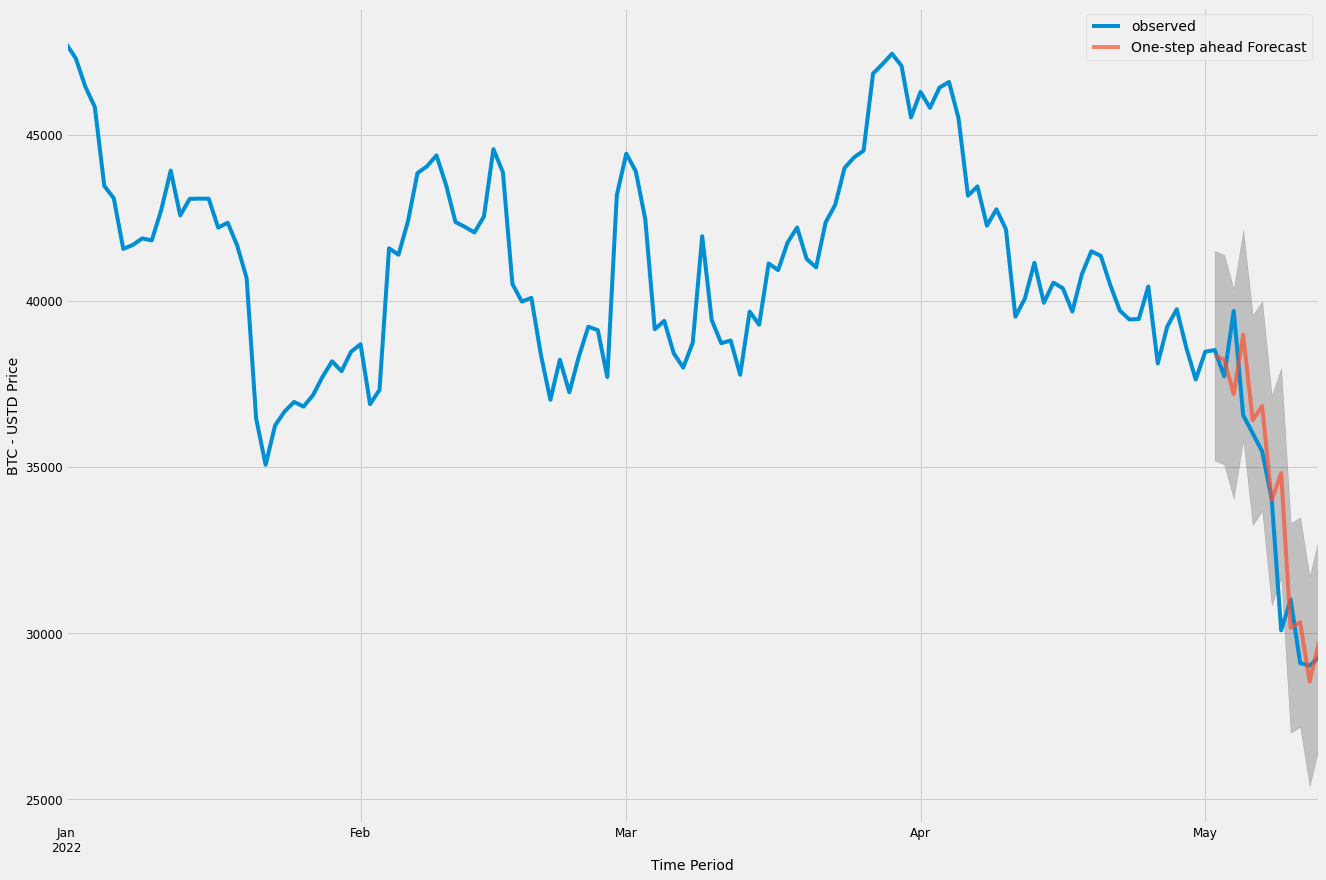

In [28]:
#Best AIC
pred = results_B.get_prediction(start=pd.to_datetime('2022-05-02'), dynamic=False)
pred_ci = pred.conf_int()

ax = df1['opening_price']['2022':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(20, 14))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Time Period')
ax.set_ylabel('BTC - USTD Price')
plt.legend()
plt.show()

pred_ci['SARIMAX Prediction - opening_price'] = pred_ci[['lower opening_price', 'upper opening_price']].mean(axis=1)
pred_ci = pred_ci.drop(['lower opening_price', 'upper opening_price'], axis=1)
Final_DF = pd.merge(df,pred_ci,how='left',left_index=True, right_index=True)

y_actual = df1['opening_price'][df1.index[-12]:]
y_predicted = pred_ci['SARIMAX Prediction - opening_price']
from sklearn.metrics import mean_squared_error
rms_sarimax = mean_squared_error(y_actual, y_predicted, squared=False)
mape_sarimax = sklearn.metrics.mean_absolute_percentage_error(y_actual, y_predicted) * 100

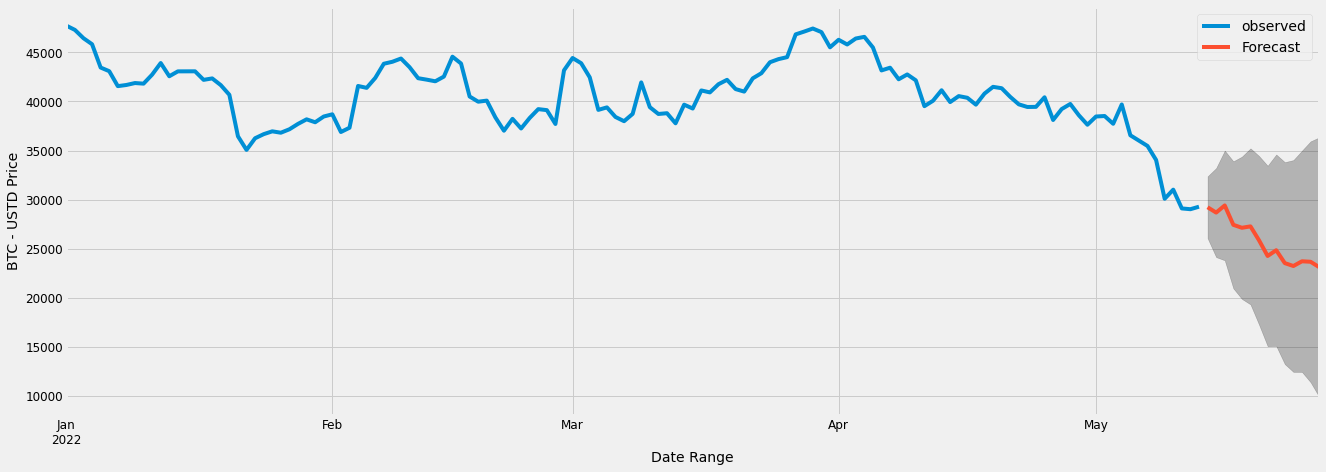

In [32]:
pred_uc = results_B.get_forecast(steps=14)
pred_ci = pred_uc.conf_int()

ax = df1['opening_price'].plot(label='observed', figsize=(20, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date Range')
ax.set_ylabel('BTC - USTD Price')
plt.legend()
plt.show()

pred_ci['SARIMAX Forecast - opening_price'] = pred_ci[['lower opening_price', 'upper opening_price']].mean(axis=1)
pred_ci = pred_ci.drop(['lower opening_price', 'upper opening_price'], axis=1)
Final_DF = pd.concat([Final_DF,pred_ci], axis = 1)

In [30]:
Final_DF

,symbol,opening_price,closing_price,highest_price,lowest_price,transaction_amount,transaction_volume,SARIMAX Prediction - opening_price,SARIMAX Forecast - opening_price
2022-01-01,BTC-USDT,47728.6,47291.8,47990.0,46656.1,4870.849832,2.301852e+08,NaN,NaN
2022-01-02,BTC-USDT,47291.7,46443.4,47577.0,45700.0,6995.618632,3.266873e+08,NaN,NaN
2022-01-03,BTC-USDT,46443.4,45833.0,47529.0,45555.0,8422.083278,3.913423e+08,NaN,NaN
2022-01-04,BTC-USDT,45833.0,43456.8,47052.4,42500.0,14203.264918,6.425458e+08,NaN,NaN
2022-01-05,BTC-USDT,43456.2,43086.1,43817.3,42420.0,9798.801801,4.222144e+08,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24259.065158
2022-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24844.283086
2022-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23530.104008
2022-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23236.123402


In [31]:
mape_sarimax

3.8105826112371393